<a href="https://colab.research.google.com/github/baskayj/Boundary-behaviour-in-stochastic-differential-equations-used-in-Finance/blob/master/Analyser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import json
import numpy as np
import matplotlib.pyplot as plt

from collections import namedtuple
from google.colab import drive

In [3]:
#To load and save simulation data

drive.mount('/content/gdrive')
DATA_PATH = '/content/gdrive/My Drive/MSc. Szakdolgozat/Data/'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
#LOADING

def Load(model,name,var_name,num_ret):
  Parameters = namedtuple('Parameters','X0 dt T kappa theta sigma')
  with open(f"{DATA_PATH}{model}{name}_params.txt","r") as infile1:
    P = Parameters(**json.load(infile1))
  infile1.close()

  var = []
  for i in range(len(var_name)):
    with open(f"{DATA_PATH}{model}{name}_{var_name[i]}_values.txt","r") as infile2:
      var.append(json.load(infile2))
  infile2.close()
  R = []
  for i in range(num_ret):
    r = np.load(f"{DATA_PATH}{model}{name}_{i}.npy")
    R.append(r)
  return P,var,R

----

# EXPERIMENT: $T \rightarrow \infty$

In [0]:
model = 'CIR_'
name = 'T_to infty'
var_name = 'gamma'
var_name = [var_name]
P,var,R = Load(model,name,var_name,3)

In [0]:
X = R[0]
tau_2X0 = R[1]
tau_0 = R[2]

---

In [0]:
P_2X0 = np.zeros((np.shape(X)[0],np.shape(X)[2]))
m = np.zeros((np.shape(X)[0],np.shape(X)[2]))

for i in range(len(var[0])):
  for j in range(np.shape(X)[2]):
    n, bins = np.histogram(X[i,:,j], bins = 200)

    c = 0
    for k in range(len(bins)):
      if bins[k] > 2*P.X0:
        c += n[k-1]
    P_2X0[i,j] = c/(np.shape(X)[1])

    m[i,j] = n[0]

---

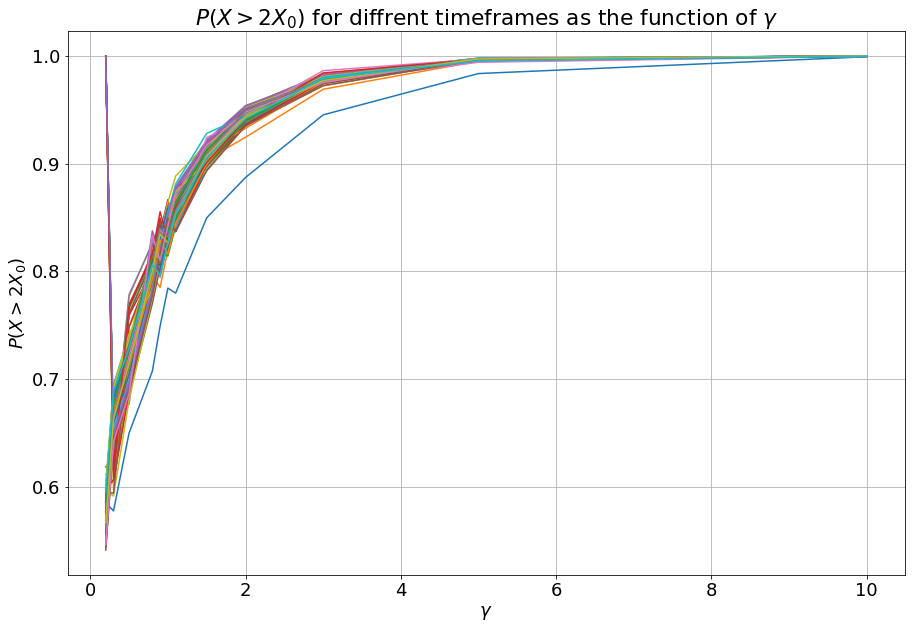

In [0]:
plt.figure(figsize=(15,10))
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 18}
plt.rc('font', **font)

for i in range(np.shape(P_2X0)[1]):
  plt.plot(var[0],P_2X0[:,i])

plt.title("$P(X>2X_0)$ for diffrent timeframes as the function of $\gamma$")
plt.xlabel("$\gamma$")
plt.ylabel("$P(X>2X_0)$")
plt.grid()
plt.show()

In [0]:
for i in range(np.shape(P_2X0)[1]):
  plt.figure()
  plt.plot(var[0],P_2X0[:,i])
  plt.show()

---

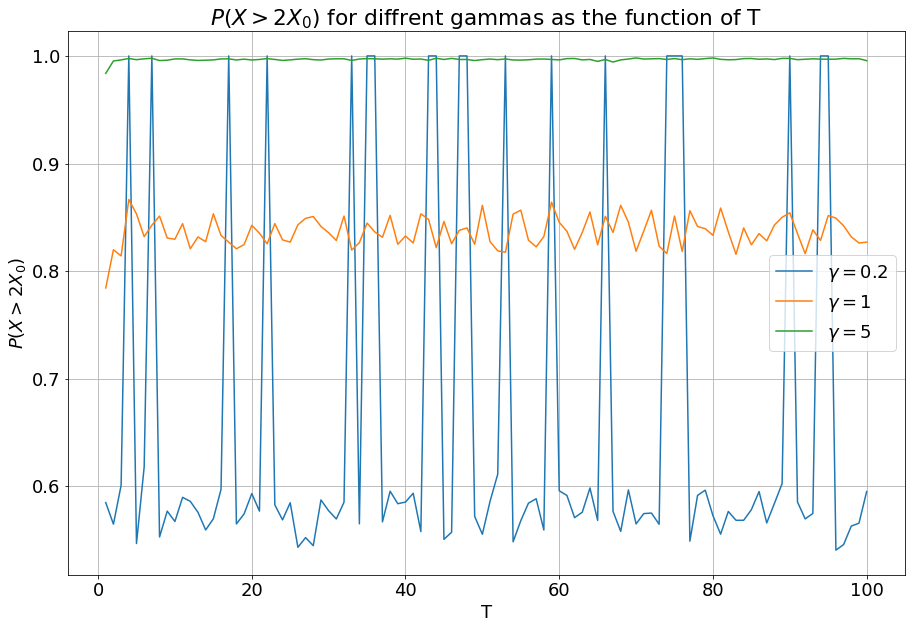

In [0]:
plt.figure(figsize=(15,10))
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 18}
plt.rc('font', **font)


for i in [0,5,10]:
  plt.plot(np.linspace(1,100,num = 100),P_2X0[i,:], label = f"$\gamma = ${var[0][i]}")


plt.title("$P(X>2X_0)$ for diffrent gammas as the function of T")
plt.xlabel("T")
plt.ylabel("$P(X>2X_0)$")
plt.legend()
plt.grid()
plt.show()

---

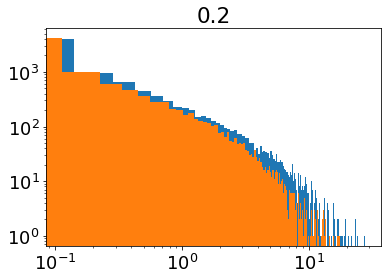

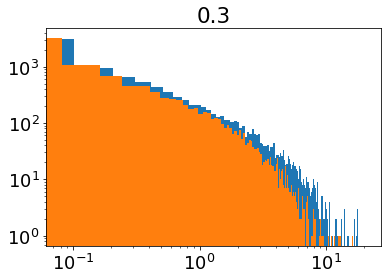

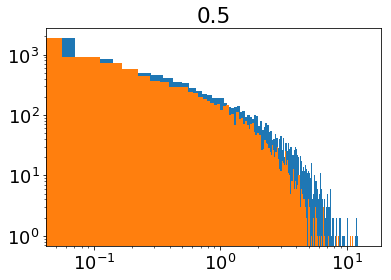

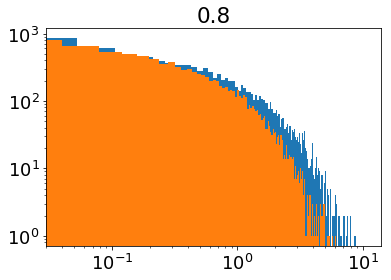

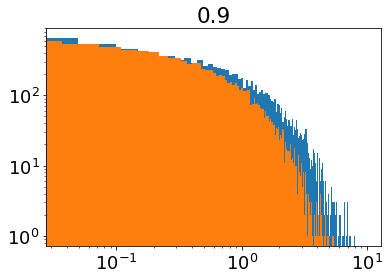

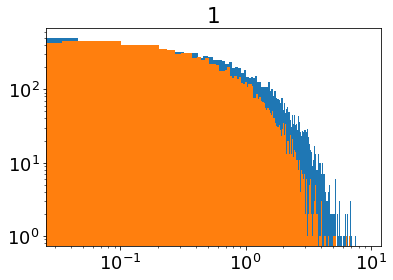

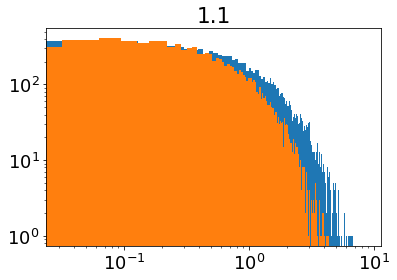

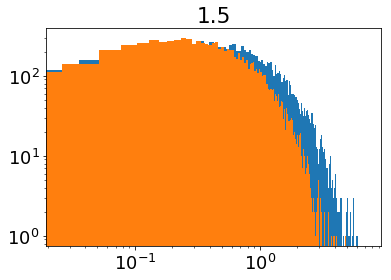

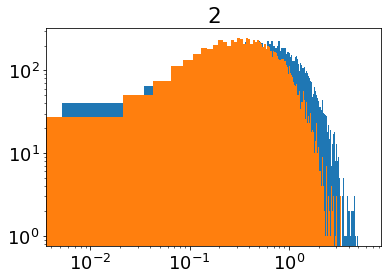

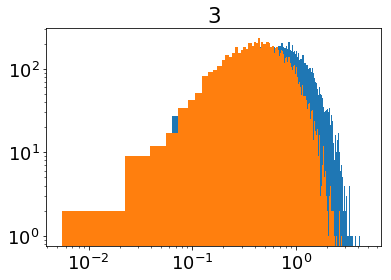

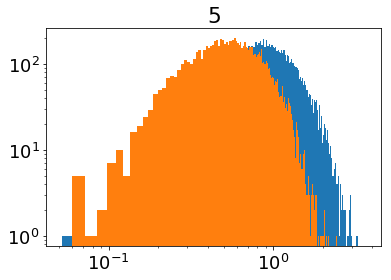

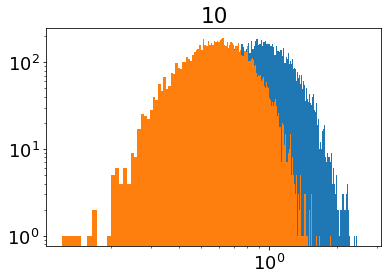

In [0]:
for i in range(len(var[0])):
  plt.figure()
  plt.title(f"{var[0][i]}")
  n, bins, patches = plt.hist(X[i,:,99], bins = 200)
  n, bins, patches = plt.hist(X[i,:,0], bins = 200)
  plt.yscale("log")
  plt.xscale("log")

---

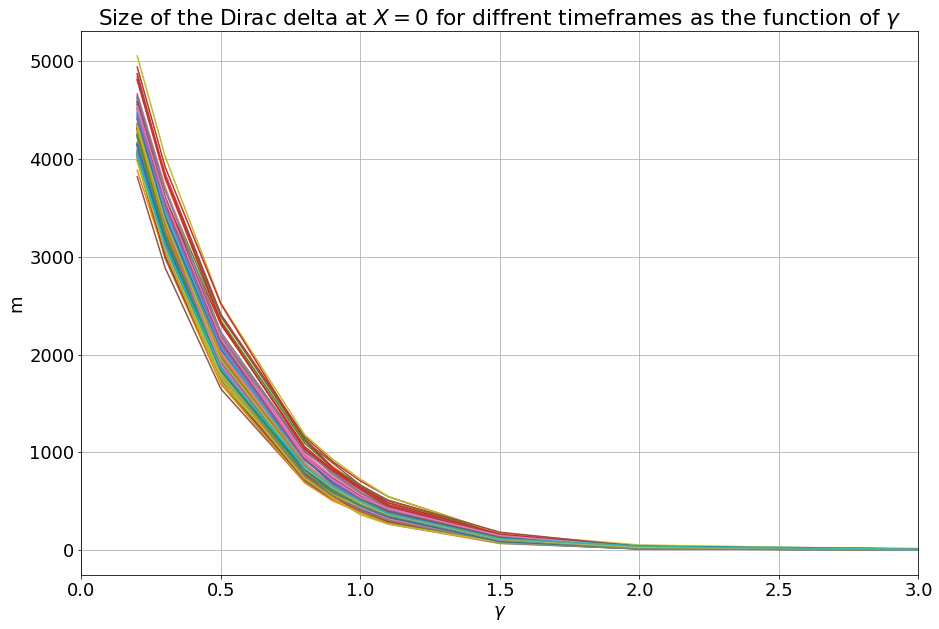

In [0]:
plt.figure(figsize=(15,10))
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 18}
plt.rc('font', **font)

for i in range(np.shape(m)[1]):
  plt.plot(var[0],m[:,i])

plt.title("Size of the Dirac delta at $X = 0$ for diffrent timeframes as the function of $\gamma$")
plt.xlabel("$\gamma$")
plt.ylabel("m")
plt.xlim((0,3))
plt.grid()
plt.show()

---

$\tau$

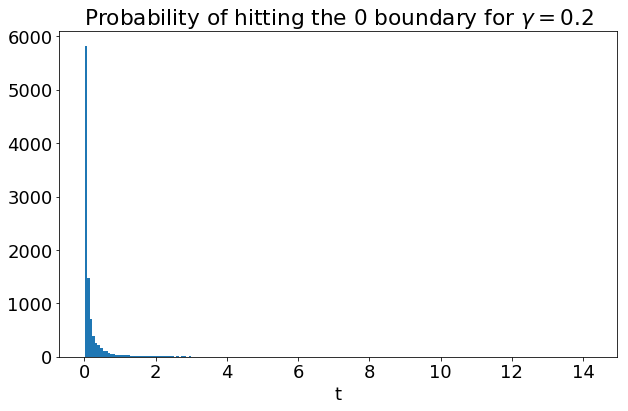

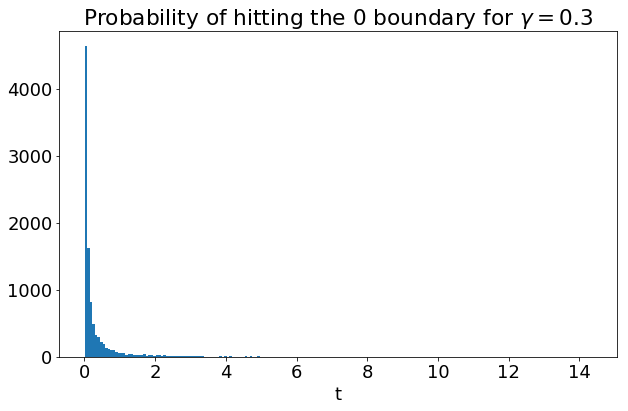

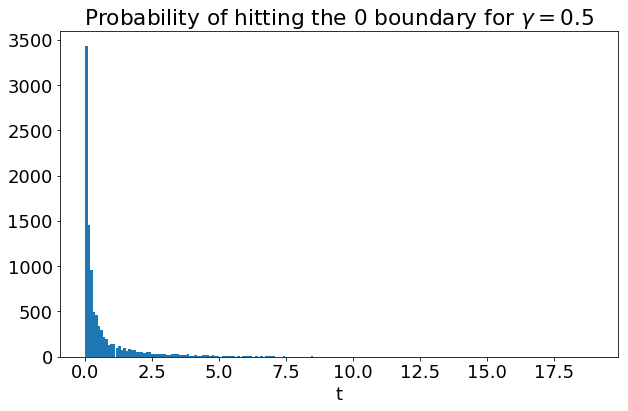

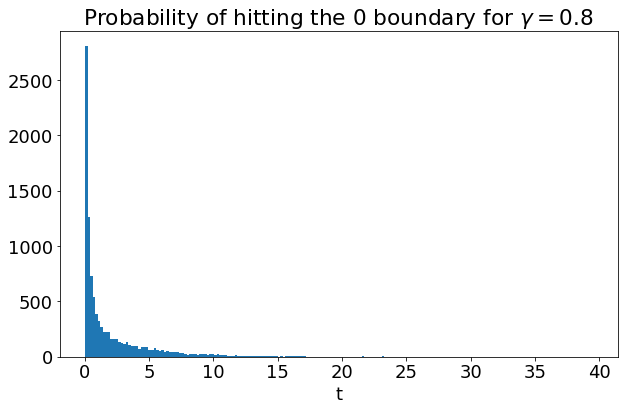

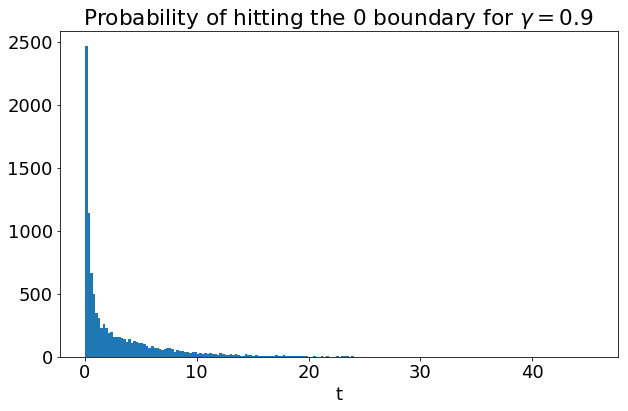

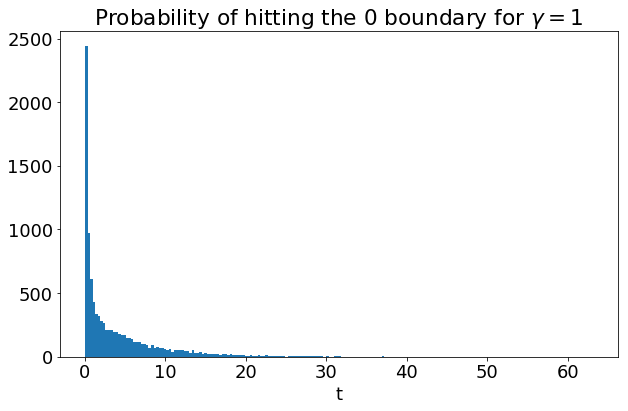

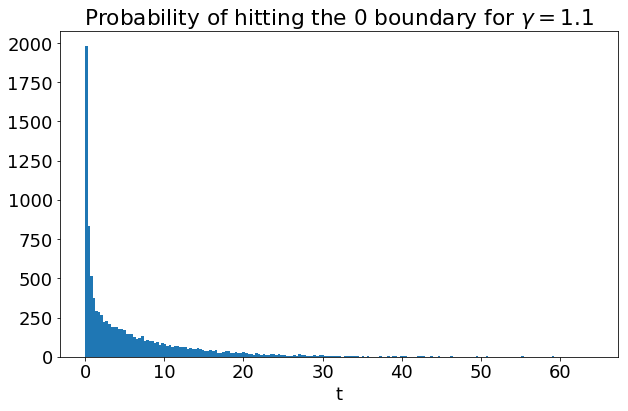

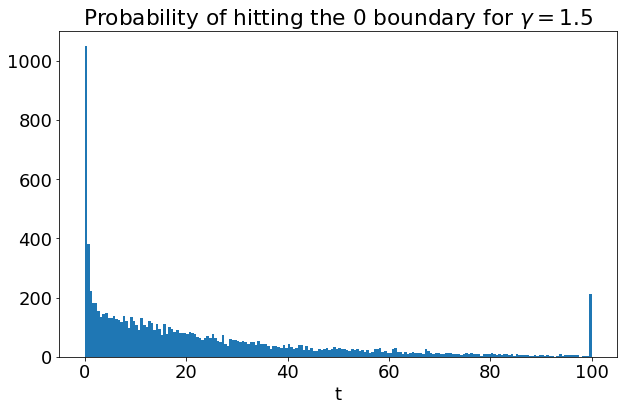

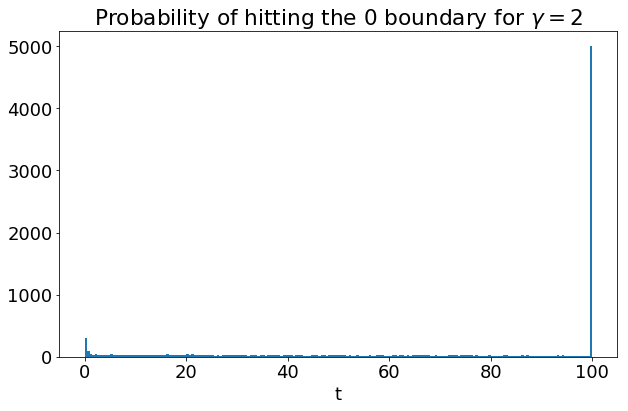

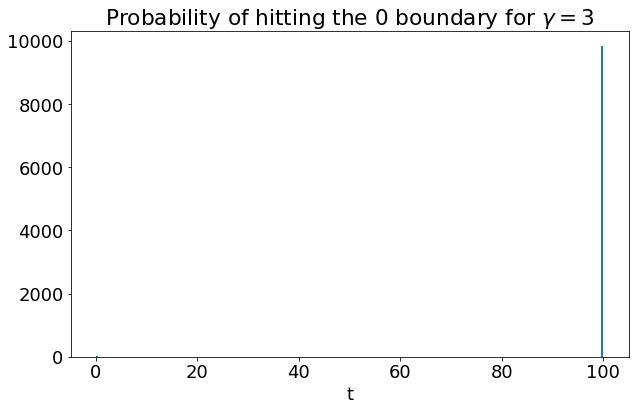

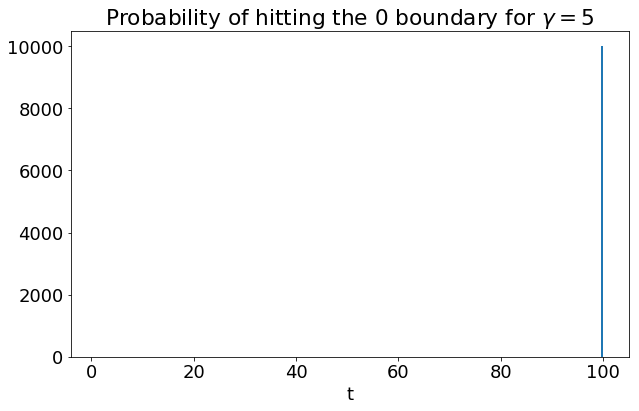

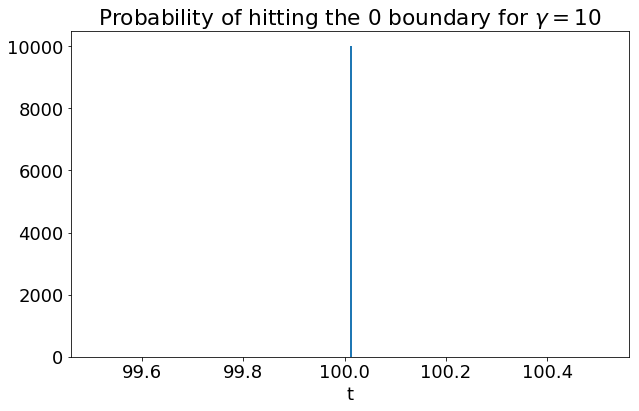

In [0]:
for i in range(len(var[0])):
  plt.figure(figsize=(10,6))
  plt.title(f"Probability of hitting the 0 boundary for $\gamma = ${var[0][i]}")
  n, bins, patches = plt.hist(tau_0[i], bins = 200)
  plt.xlabel("t")

---

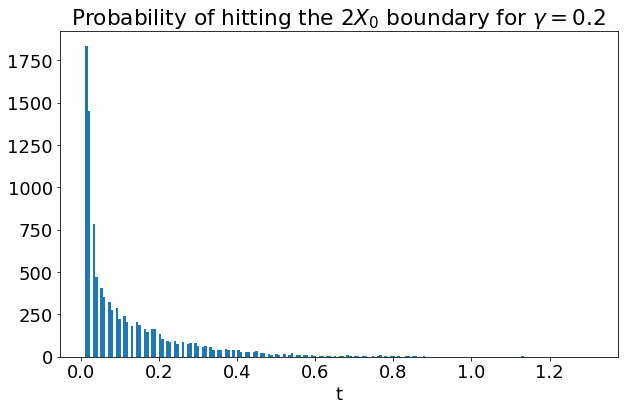

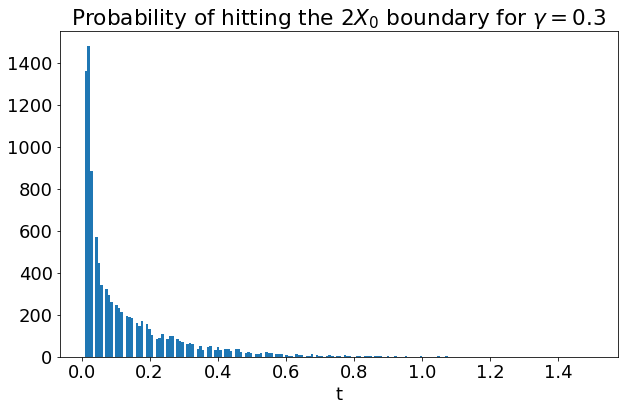

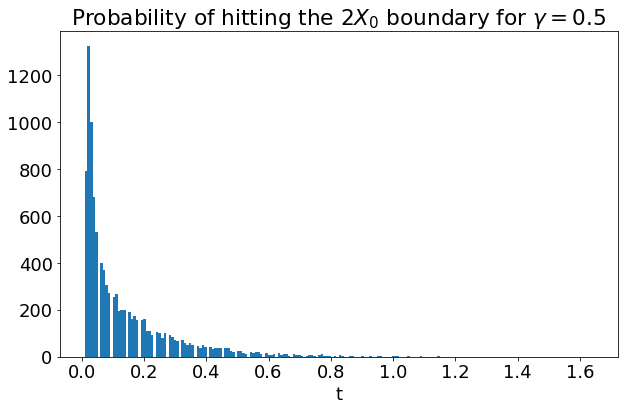

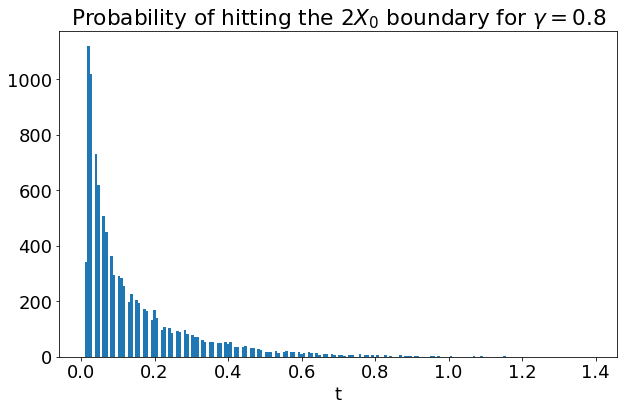

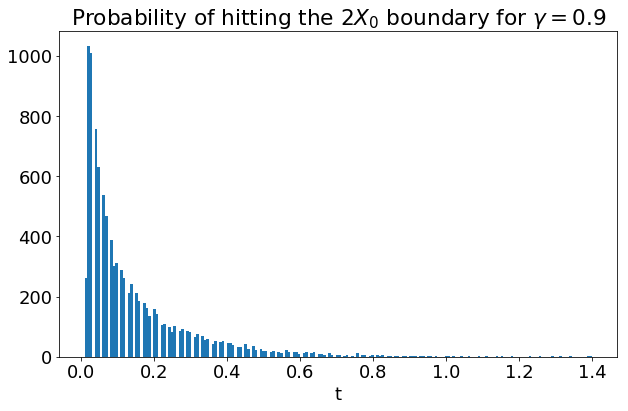

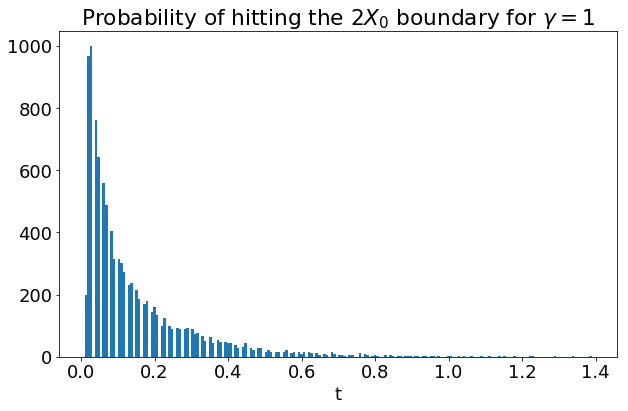

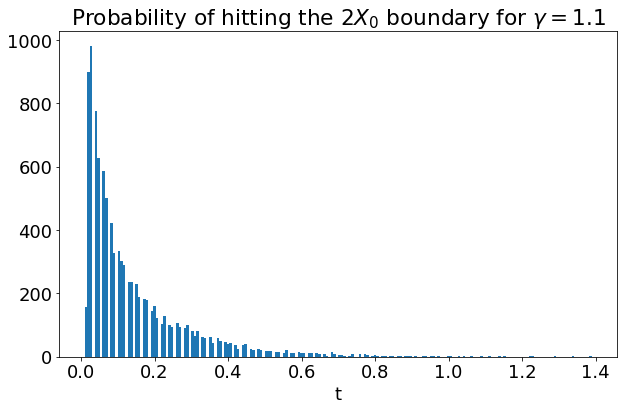

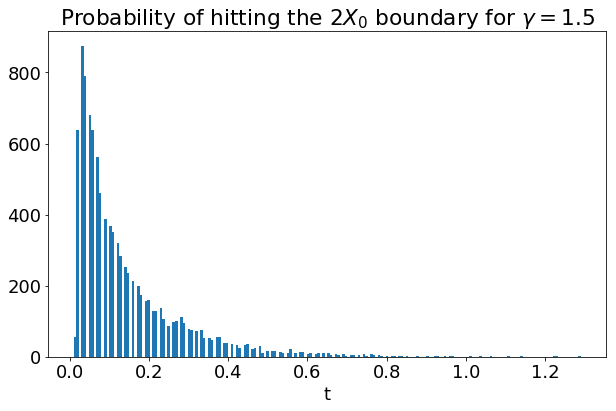

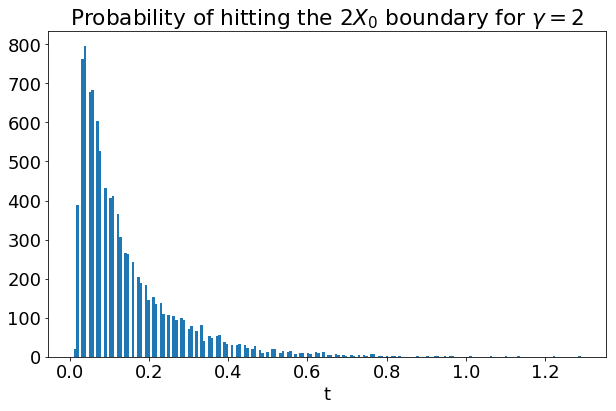

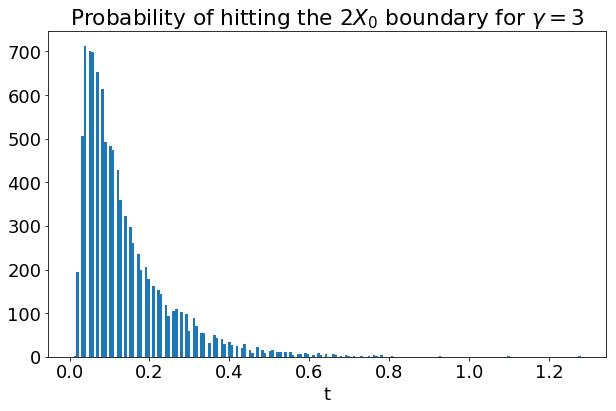

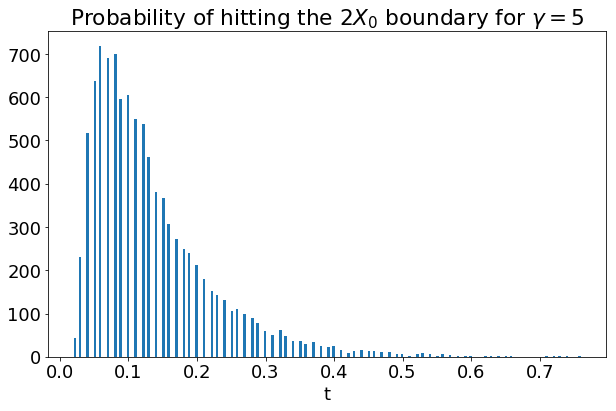

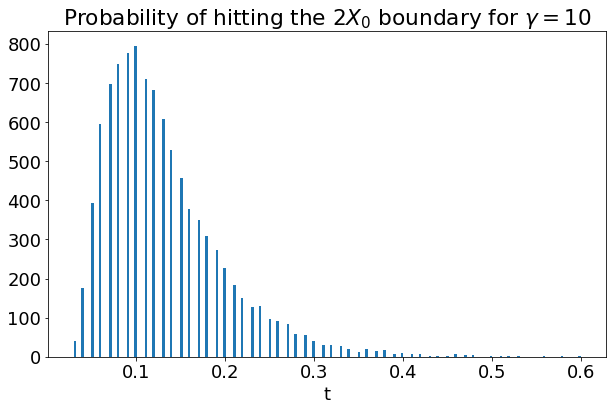

In [0]:
for i in range(len(var[0])):
  plt.figure(figsize=(10,6))
  plt.title(f"Probability of hitting the $2X_0$ boundary for $\gamma = ${var[0][i]}")
  n, bins, patches = plt.hist(tau_2X0[i], bins = 200)
  plt.xlabel("t")

---

## Older Results

In [0]:
#Loading in all the simaltion data
model = 'CIR_'
name = 'T_to_infty_part_1'
var_name1 = 'T'
var_name2 = 'dt'
var_name3 = 'X0'
var_name4 = 'gamma'
var_name = [var_name1,var_name2,var_name3,var_name4]
P1,var1,X1 = Load(model,name,var_name)

model = 'CIR_'
name = 'T_to_infty_part_2'
var_name1 = 'T'
var_name2 = 'dt'
var_name3 = 'X0'
var_name4 = 'gamma'
var_name = [var_name1,var_name2,var_name3,var_name4]
P2,var2,X2 = Load(model,name,var_name)

model = 'CIR_'
name = 'T_to_infty_part_3'
var_name1 = 'T'
var_name2 = 'dt'
var_name3 = 'X0'
var_name4 = 'gamma'
var_name = [var_name1,var_name2,var_name3,var_name4]
P3,var3,X3 = Load(model,name,var_name)

model = 'CIR_'
name = 'T_to_infty_part_4'
var_name1 = 'T'
var_name2 = 'dt'
var_name3 = 'X0'
var_name4 = 'gamma'
var_name = [var_name1,var_name2,var_name3,var_name4]
P4,var4,X4 = Load(model,name,var_name)

In [0]:
#Making the histograms from the data
N = []
BINS = []

for x in [X1,X2,X3,X4]:
  for i in range(len(x)):
    n,bins = np.histogram(x[i,:],bins = 500)
    N.append(n)
    BINS.append(bins)

In [0]:
#P(x>2*X0) the probability, that the process goes above 2*X0
def P_2X0(n,bins,X0):
  c = 0
  for i in range(len(bins)):
    if bins[i] > 2*X0:
      c += n[i-1]
  return (c/10000)

In [0]:
P = P1 #The basic parameters were set the same for all 4 parts
T = []
for var in [var1,var2,var3,var4]:
  sigma = list(map(lambda p: np.sqrt((2*P.kappa*P.theta)/p),var[3]))
  for i in range(len(var[0])):
    for j in range(len(var[1])):
      for k in range(len(var[2])):
        for l in range(len(var[3])):
          T.append([var[2][k],var[1][j],var[0][i],P.kappa,P.theta,sigma[l]])

In [0]:
for i in range(len(T)):
  T[i].append(P_2X0(N[i],BINS[i],T[i][0]))

Text(0, 0.5, 'P(x>2X0)')

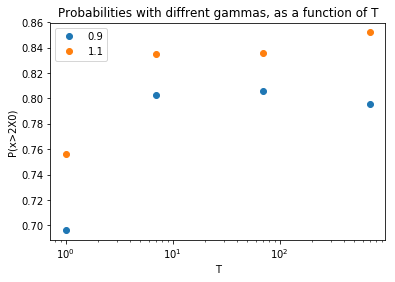

In [0]:
X0 = 0.1
dt = 0.1

for gamma in var1[3]:
  sigma = np.sqrt((2*P.kappa*P.theta)/gamma)
  t = []
  p_t = []
  for i in range(len(T)):
    if T[i][1] == dt:
      if T[i][0] == X0:
        if T[i][5] == sigma:
          t.append(T[i][2])
          p_t.append(T[i][6])

  plt.plot(t,p_t,"o")
plt.xscale("log")
plt.title("Probabilities with diffrent gammas, as a function of T")
plt.legend((0.9,1.1))
plt.xlabel("T")
plt.ylabel("P(x>2X0)")

Text(0, 0.5, 'P(x>2X0)')

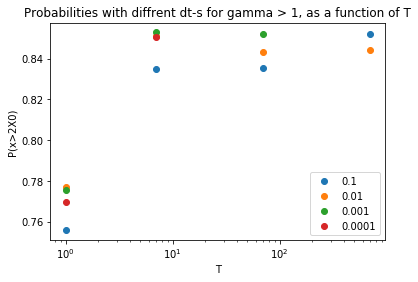

In [0]:
X0 = 0.1
gamma = 1.1

for dt in [0.1,0.01,0.001,0.0001]:
  sigma = np.sqrt((2*P.kappa*P.theta)/gamma)
  t = []
  p_t = []
  for i in range(len(T)):
    if T[i][1] == dt:
      if T[i][0] == X0:
        if T[i][5] == sigma:
          t.append(T[i][2])
          p_t.append(T[i][6])

  plt.plot(t,p_t,"o")
plt.xscale("log")
plt.title("Probabilities with diffrent dt-s for gamma > 1, as a function of T")
plt.legend((0.1,0.01,0.001,0.0001))
plt.xlabel("T")
plt.ylabel("P(x>2X0)")

Text(0, 0.5, 'P(x>2X0)')

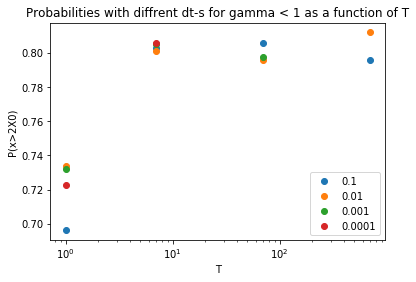

In [0]:
X0 = 0.1
gamma = 0.9

for dt in [0.1,0.01,0.001,0.0001]:
  sigma = np.sqrt((2*P.kappa*P.theta)/gamma)
  t = []
  p_t = []
  for i in range(len(T)):
    if T[i][1] == dt:
      if T[i][0] == X0:
        if T[i][5] == sigma:
          t.append(T[i][2])
          p_t.append(T[i][6])

  plt.plot(t,p_t,"o")
plt.xscale("log")
plt.title("Probabilities with diffrent dt-s for gamma < 1 as a function of T")
plt.legend((0.1,0.01,0.001,0.0001))
plt.xlabel("T")
plt.ylabel("P(x>2X0)")

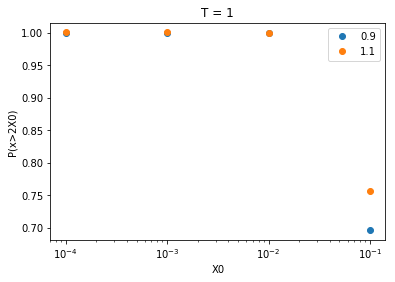

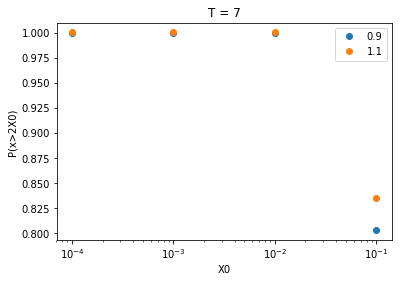

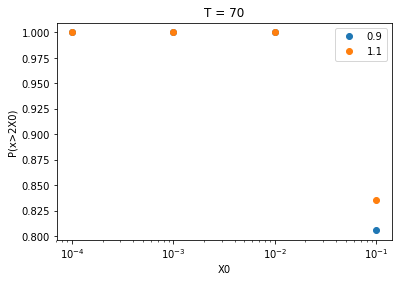

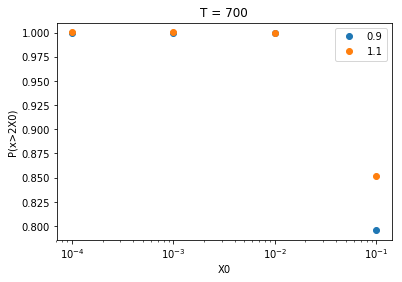

In [0]:
for TT in [1,7,70,700]:
  plt.figure()
  dt = 0.1

  for gamma in var1[3]:
    sigma = np.sqrt((2*P.kappa*P.theta)/gamma)
    epsilon = []
    p_epsilon = []
    for i in range(len(T)):
      if T[i][1] == dt:
        if T[i][2] == TT:
          if T[i][5] == sigma:
            epsilon.append(T[i][0])
            p_epsilon.append(T[i][6])

    plt.plot(epsilon,p_epsilon,"o")
  plt.xscale("log")
  plt.title(f"T = {TT}")
  plt.legend((0.9,1.1))
  plt.xlabel("X0")
  plt.ylabel("P(x>2X0)")
  plt.show()

# EXPERIMENT: Using the Noncentral $\chi ^2$-distribution

In [0]:
model = 'CIR_'
name = 'nccs_test'
var_name = 'gamma'
var_name = [var_name]
P_nccs,var_nccs,X_nccs = Load(model,name,var_name)

In [0]:
X_nccs[6][5]

array([0.10865047, 0.10865047, 0.10865047, 0.10865047, 0.10865047,
       0.10865047, 0.10865047, 0.10865047, 0.10865047, 0.10865047])

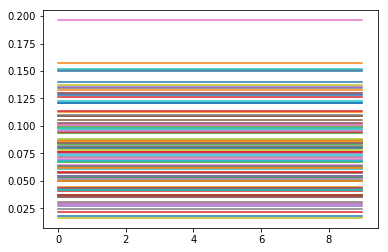

In [0]:
for i in range(0,100):
  plt.plot(X_nccs[6,i])

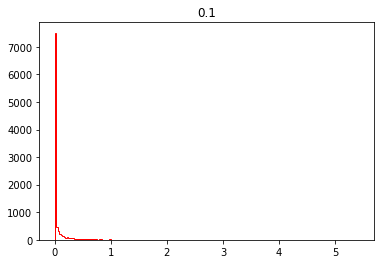

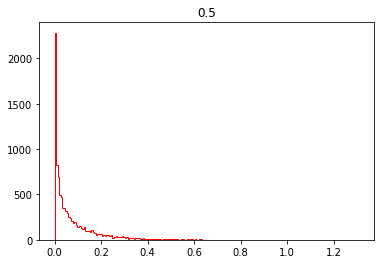

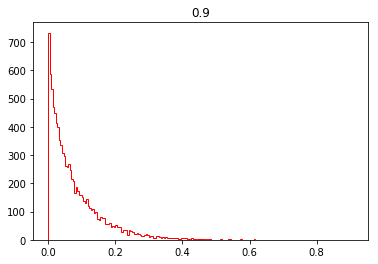

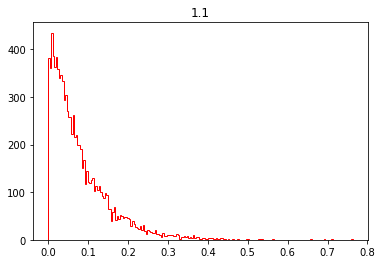

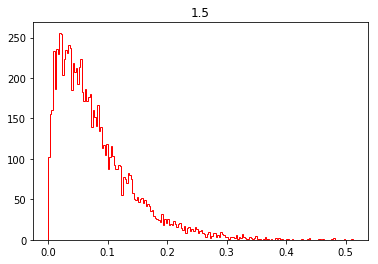

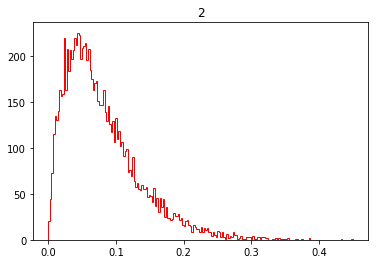

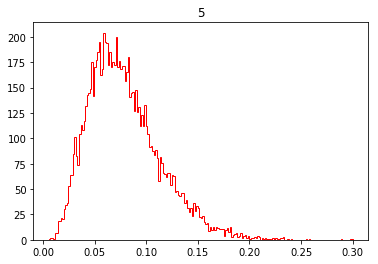

In [0]:
#We are just going to check, wether the new simultation method works

model = 'CIR_'
name = 'nccs_test'
var_name = 'gamma'
var_name = [var_name]
P_nccs,var_nccs,X_nccs = Load(model,name,var_name)

for i in range(len(X_nccs)):
  plt.figure()
  plt.title(f"{var_nccs[0][i]}")
  n,bins, patches = plt.hist(X_nccs[i,:],bins = 200, histtype = "step", density = False, color = "red",label = "NCCS")

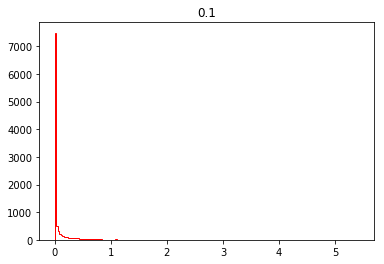

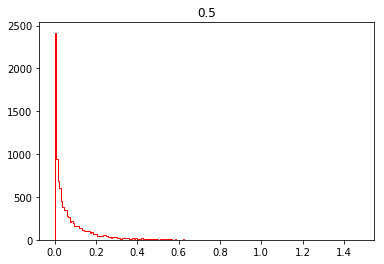

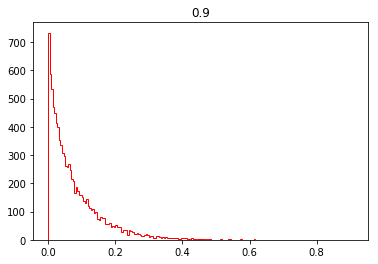

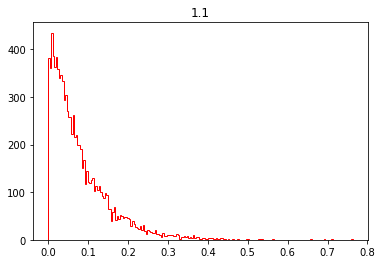

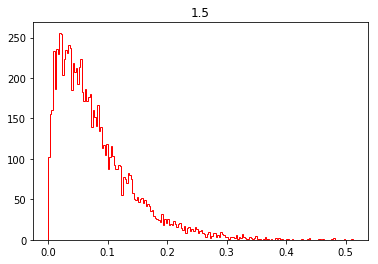

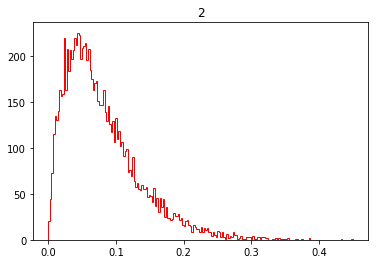

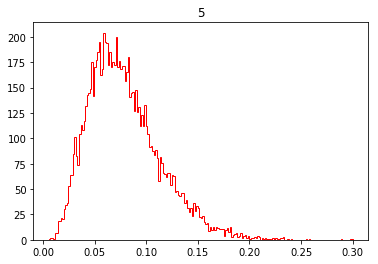

In [0]:
for i in range(len(X_nccs)):
  plt.figure()
  plt.title(f"{var_nccs[0][i]}")
  n,bins, patches = plt.hist(X_nccs[i,:],bins = 200, histtype = "step", density = False, color = "red",label = "NCCS")

In [0]:
for i in range(len(X_nccs)):
  fig = plt.figure()
  ax1 = fig.add_subplot(111, label="1")
  ax2 = fig.add_subplot(111, label="2", frame_on=False)
  plt.title(f"Gamma = {var_nccs[0][i]}")
  ax1.hist(X_nccs[i,:],bins = 200, density = True, color = "red",label = "NCCS")
  ax2.hist(X_t[i,:],bins = 200, density = True, histtype = "step", color = "blue",label = "Ordinary")
  ax2.xaxis.tick_top()
  ax2.yaxis.tick_right()
  ax1.legend(loc = 1)
  ax2.legend(loc = 4)
  plt.show()

#EXPERIMENT: Finding the critical $\gamma$-value numerically

# MISC. TEST

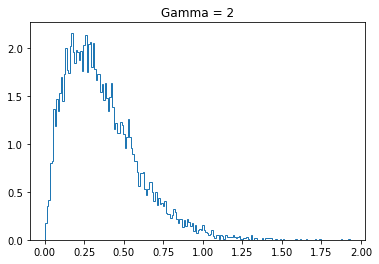

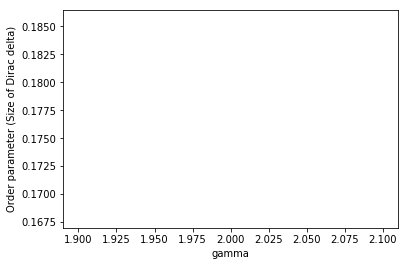

In [0]:
name = "test"

p = np.load(DATA_PATH + 'CIR_' + name + '_params' + '.npy')
ip = np.load(DATA_PATH + 'CIR_' + name + '_values' + '.npy')
X = np.load(DATA_PATH + 'CIR_' + name + '.npy')

mm = np.zeros(np.shape(ip))
#Histogram

for j in range(0,np.shape(X)[0]):
  plt.figure()
  plt.title("Gamma = " + str(ip[j]))
  n,bins,patches = plt.hist(X[j,:,(np.shape(X)[2]-1)],bins = 200, density = True, histtype = "step")
  plt.show()
  mm[j] = n[0]

plt.figure()
plt.plot(ip,mm)
plt.xlabel("gamma")
plt.ylabel("Order parameter (Size of Dirac delta)")
plt.show()